<div style="background-color: #00008B; padding: 20px;">
    <h1 style="font-size: 100px; color: #ffffff;">Statistical Hypothesis Testing</h1>
</div>

<div style="border: 2px solid purple; border-radius: 10px; padding: 15px; background-color: #f9f2ff;">
    <h2 style="color: purple;">Understanding the Central Limit Theorem (CLT)</h2>
    <p style="font-size: 16px; color: black;">
        The Central Limit Theorem (CLT) is a fundamental statistical principle that explains the behavior of the distribution of sample means. It states that, given a sufficiently large sample size, the sampling distribution of the sample mean will be approximately normally distributed, regardless of the shape of the original population distribution. This theorem is critical for many statistical methods, including hypothesis testing and confidence intervals.
    </p>
    <h3 style="color: purple;">Mathematical Formulation</h3>
    <p style="font-size: 16px; color: black;">
        Let's consider a population with a mean \( \mu \) and a finite standard deviation \( \sigma \). Suppose we draw random samples of size \( n \) from this population and calculate the sample mean \( \bar{X} \) for each sample. The Central Limit Theorem states that as the sample size \( n \) becomes large, the sampling distribution of \( \bar{X} \) will approach a normal distribution with the following properties:
    </p>
    <ul style="font-size: 16px; color: black;">
        <li><b>Mean of the Sampling Distribution:</b> The mean of the sampling distribution of \( \bar{X} \) will be equal to the population mean \( \mu \).<br>
        \[
        \text{E}(\bar{X}) = \mu
        \]</li>
        <li><b>Standard Deviation of the Sampling Distribution:</b> The standard deviation of the sampling distribution of \( \bar{X} \), known as the standard error, will be equal to the population standard deviation \( \sigma \) divided by the square root of the sample size \( n \).<br>
        \[
        \text{SE}(\bar{X}) = \frac{\sigma}{\sqrt{n}}
        \]</li>
    </ul>
    <p style="font-size: 16px; color: black;">
        Formally, if \( X_1, X_2, \ldots, X_n \) are i.i.d. random variables from a population with mean \( \mu \) and variance \( \sigma^2 \), the distribution of the sample mean \( \bar{X} \) is given by:
    </p>
    \[
    \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i
    \]
    <p style="font-size: 16px; color: black;">
        As \( n \to \infty \), the distribution of \( \bar{X} \) approaches:
    </p>
    \[
    \bar{X} \sim \mathcal{N} \left( \mu, \frac{\sigma^2}{n} \right)
    \]
    <p style="font-size: 16px; color: black;">
        This means that for large sample sizes, the distribution of the sample mean \( \bar{X} \) will be approximately normal, centered around the population mean \( \mu \) with a standard error of \( \frac{\sigma}{\sqrt{n}} \).
    </p>
    <h3 style="color: purple;">Implications of the CLT</h3>
    <p style="font-size: 16px; color: black;">
        The CLT has several important implications in statistics:
    </p>
    <ul style="font-size: 16px; color: black;">
        <li><b>Normality Assumption:</b> It justifies the use of the normal distribution in hypothesis testing and confidence intervals, even when the original data are not normally distributed, as long as the sample size is large enough.</li>
        <li><b>Sample Size:</b> The larger the sample size, the more the sampling distribution of the mean will resemble a normal distribution. Typically, a sample size of \( n \geq 30 \) is considered sufficient for the CLT to hold.</li>
    </ul>
    <h3 style="color: purple;">Example</h3>
    <p style="font-size: 16px; color: black;">
        Suppose we have a population of test scores that are uniformly distributed between 0 and 100. If we take random samples of size \( n = 50 \) and calculate the sample mean for each sample, the distribution of these sample means will be approximately normal due to the CLT, even though the original population distribution is uniform.
    </p>
</div>


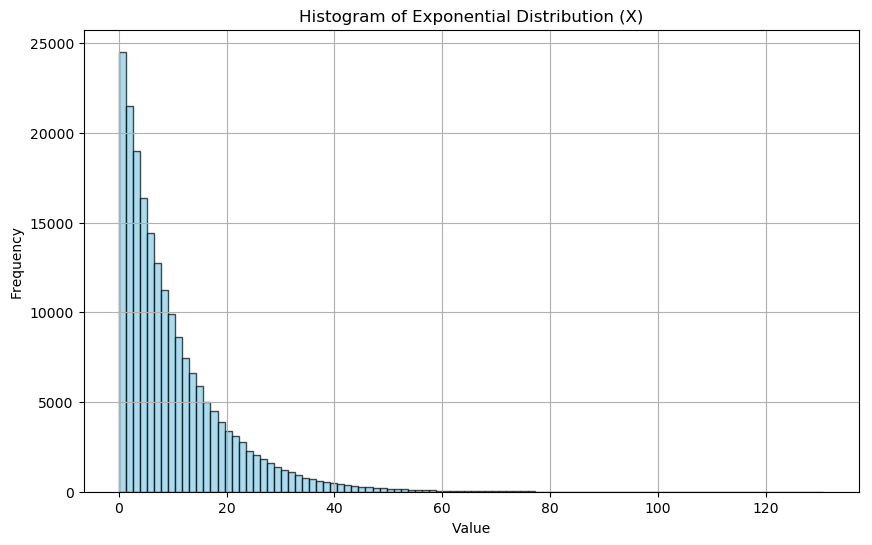

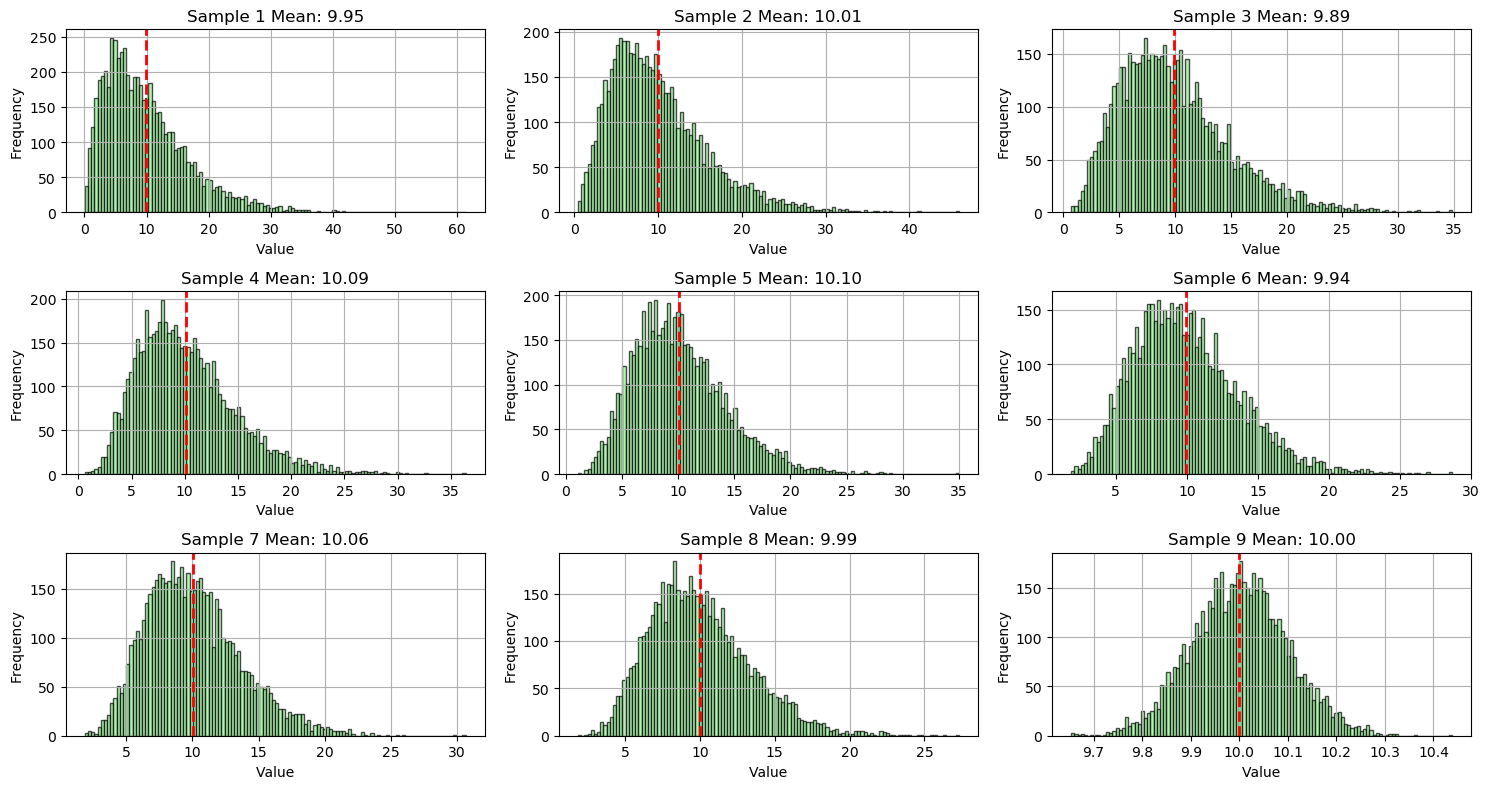

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 200000 samples from exponential distribution
X = np.random.exponential(scale=10.0, size=200000)

# Step 2: Make a histogram of X
plt.figure(figsize=(10, 6))
plt.hist(X, bins=100, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Exponential Distribution (X)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 3: Sampling to illustrate Central Limit Theorem
# Number of samples to take
list_samples = [2 ,  3 , 4 , 5 , 6 , 7 , 8 , 9 , 10000  ]
num_samples = len( list_samples )

# Create subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Generate and plot sample means
for i in range(num_samples):
    # Randomly sample from X and calculate the mean of each sample
    sample = np.random.choice(X , size = (6000, list_samples[i]) ,  ).mean( axis = 1)
    # Calculate the sample mean
    sample_mean = np.mean(sample)
    # Plot histogram of the sample means
    axes[i].hist(sample, bins=120, color='lightgreen', edgecolor='black', alpha=0.7)
    # Plot vertical line for the sample mean
    axes[i].axvline(sample_mean, color='red', linestyle='dashed', linewidth=2)
    # Add title
    axes[i].set_title(f'Sample {i+1} Mean: {sample_mean:.2f}')
    # Add x-label
    axes[i].set_xlabel('Value')
    # Add y-label
    axes[i].set_ylabel('Frequency')
    # Add grid
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


<div style="border: 2px solid purple;  border-radius: 10px; padding: 10px;">
    <h2 style="color: purple;">Statistical Hypothesis Testing</h2>
    <p style="font-size: 16px;">Statistical hypothesis testing is a method used in statistics to make decisions or inferences about a population parameter based on sample data. It involves formulating two competing hypotheses: the null hypothesis (H0) and the alternative hypothesis (H1). The null hypothesis typically represents the status quo or a default assumption, while the alternative hypothesis represents the claim or effect we are interested in testing.</p>
    <h3 style="color: purple;">Key Steps in Hypothesis Testing:</h3>
    <ol style="font-size: 16px;">
        <li>Formulating Hypotheses</li>
        <li>Choosing a Significance Level</li>
        <li>Selecting a Test Statistic</li>
        <li>Calculating the Test Statistic</li>
        <li>Making a Decision</li>
        <li>Interpreting the Results</li>
    </ol>
    <h3 style="color: purple;">Most Famous Statistical Tests:</h3>
    <ul style="font-size: 16px;">
        <li>Student's t-test</li>
        <li>Chi-square test</li>
        <li>ANOVA (Analysis of Variance)</li>
        <li>Paired t-test</li>
        <li>Wilcoxon signed-rank test</li>
        <li>Mann-Whitney U test</li>
        <li>Kolmogorov-Smirnov test</li>
        <li>Fisher's exact test</li>
    </ul>
    <p style="font-size: 16px;">These tests are commonly used for different types of statistical analyses, ranging from comparing means to assessing associations between categorical variables.</p>
</div>


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px;">
    <h2 style="color: purple;">Student's t-Test: Step-by-Step Explanation</h2>
    <p style="font-size: 16px; color: black;">
        The Student's t-Test is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It is commonly used when the sample sizes are small, and the population standard deviation is unknown.
    </p>
    <h3 style="color: purple;">Steps Involved in the Student's t-Test:</h3>
    <ol style="font-size: 16px; color: black;">
        <li><b>Formulate Hypotheses:</b>
            <ul>
                <li><b>Null Hypothesis (\(H_0\)):</b> The means of the two groups are equal (\(\mu_1 = \mu_2\)).</li>
                <li><b>Alternative Hypothesis (\(H_1\)):</b> The means of the two groups are not equal (\(\mu_1 \ne \mu_2\)).</li>
            </ul>
        </li>
        <li><b>Choose Significance Level:</b> Select a significance level (\(\alpha\)), commonly set at 0.05 or 0.01.</li>
        <li><b>Calculate the Test Statistic:</b>
            <ul>
                <li>Compute the sample means (\(\bar{X_1}\) and \(\bar{X_2}\)) and standard deviations (\(s_1\) and \(s_2\)) of the two groups.</li>
                <li>Calculate the pooled standard deviation (\(s_p\)) using:
                \[
                s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}}
                \]
                </li>
                <li>Calculate the t-statistic using:
                \[
                t = \frac{\bar{X_1} - \bar{X_2}}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
                \]
                where \(n_1\) and \(n_2\) are the sample sizes of the two groups.</li>
            </ul>
        </li>
        <li><b>Determine the Degrees of Freedom:</b> The degrees of freedom (\(df\)) for the t-test is given by:
        \[
        df = n_1 + n_2 - 2
        </li>
        <li><b>Find the Critical Value and Make a Decision:</b>
            <ul>
                <li>Use the t-distribution table to find the critical value for the chosen significance level (\(\alpha\)) and the degrees of freedom (\(df\)).</li>
                <li>If the absolute value of the computed t-statistic is greater than the critical value, reject the null hypothesis (\(H_0\)). Otherwise, fail to reject the null hypothesis.</li>
            </ul>
        </li>
        <li><b>Draw Conclusions:</b> Based on the decision in step 5, interpret the results in the context of the research question.
            <ul>
                <li>If \(H_0\) is rejected, conclude that there is a significant difference between the means of the two groups.</li>
                <li>If \(H_0\) is not rejected, conclude that there is no significant difference between the means of the two groups.</li>
            </ul>
        </li>
    </ol>
    <h3 style="color: purple;">Example</h3>
    <p style="font-size: 16px; color: black;">
        Suppose we want to test whether a new teaching method is more effective than the traditional method. We collect test scores from two groups of students: one using the new method and the other using the traditional method. The test scores are as follows:
    </p>
    <table style="width: 100%; border-collapse: collapse; margin: 15px 0;">
        <tr>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Group</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Sample Size</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Mean</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Standard Deviation</th>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">New Method</td>
            <td style="border: 1px solid black; padding: 8px;">30</td>
            <td style="border: 1px solid black; padding: 8px;">85</td>
            <td style="border: 1px solid black; padding: 8px;">10</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">Traditional Method</td>
            <td style="border: 1px solid black; padding: 8px;">30</td>
            <td style="border: 1px solid black; padding: 8px;">80</td>
            <td style="border: 1px solid black; padding: 8px;">12</td>
        </tr>
    </table>
    <p style="font-size: 16px; color: black;">
        We calculate the pooled standard deviation, the t-statistic, and compare it to the critical value from the t-distribution table. If our computed t-statistic is greater than the critical value, we reject the null hypothesis and conclude that the new teaching method is significantly more effective than the traditional method.
    </p>
</div>


<div style="border: 2px solid red; border-radius: 10px; padding: 15px; border-radius: 10px; background-color: #FFFDD0">
<h2 style="color: red;">⚠️ Important Note on Normality in the Student's t-test ⚠️</h2>
<p style="font-size: 16px; color: darkred;">When performing a Student's t-test, the assumption of normality can be considered in two different contexts: the normality of the individual data points \(X_1\) and \(X_2\), and the normality of the sample means \(\bar{X_1}\) and \(\bar{X_2}\). Understanding these distinctions is crucial for correctly applying the t-test.</p>

<h3 style="color: red;">Normality of Individual Data Points \(X_1\) and \(X_2\)</h3>
<p style="font-size: 16px; color: darkred;">For smaller sample sizes (typically \(n < 30\)), it is important that the individual data points \(X_1\) and \(X_2\) in each group are approximately normally distributed. This is because the t-test relies on the assumption that the underlying data distribution is normal to accurately estimate the variability and calculate the t-statistic.</p>

<h3 style="color: red;">Normality of Sample Means \(\bar{X_1}\) and \(\bar{X_2}\)</h3>
<p style="font-size: 16px; color: darkred;">For larger sample sizes (typically \(n \ge 30\)), the Central Limit Theorem (CLT) comes into play. The CLT states that the distribution of the sample means \(\bar{X_1}\) and \(\bar{X_2}\) will be approximately normal regardless of the distribution of the individual data points, provided the sample size is sufficiently large. In this case, the normality assumption is less critical for the individual data points.</p>

<h3 style="color: red;">Practical Implications</h3>
<p style="font-size: 16px; color: darkred;">In practice, this means:</p>
<ul style="font-size: 16px; color: darkred;">
<li><b>Small Sample Sizes:</b> When dealing with small sample sizes, check for the normality of the individual data points \(X_1\) and \(X_2\) using visual tools like Q-Q plots or statistical tests like the Shapiro-Wilk test.</li>
<li><b>Large Sample Sizes:</b> For large sample sizes, focus more on the distribution of the sample means \(\bar{X_1}\) and \(\bar{X_2}\). The Central Limit Theorem suggests that these means will be normally distributed even if the original data are not.</li>
</ul>

<h3 style="color: red;">Summary</h3>
<p style="font-size: 16px; color: darkred;">In summary, while the normality assumption primarily concerns the distribution of the sample means \(\bar{X_1}\) and \(\bar{X_2}\), checking the normality of the individual data points \(X_1\) and \(X_2\) becomes crucial for small sample sizes. For larger samples, the CLT assures that the sample means will be approximately normal, making the t-test robust to deviations from normality in the original data.</p>
</div>


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px; ">
    <h2 style="color: purple;">Chi-Square Test: Step-by-Step Explanation</h2>
    <p style="font-size: 16px; color: black;">
        The Chi-Square Test is a statistical test used to determine whether there is a significant association between categorical variables. It is commonly used in hypothesis testing to compare observed frequencies with expected frequencies under the null hypothesis.
    </p>
    <h3 style="color: purple;">Steps Involved in the Chi-Square Test:</h3>
    <ol style="font-size: 16px; color: black;">
        <li><b>Formulate Hypotheses:</b>
            <ul>
                <li><b>Null Hypothesis (\(H_0\)):</b> There is no significant association between the categorical variables.</li>
                <li><b>Alternative Hypothesis (\(H_1\)):</b> There is a significant association between the categorical variables.</li>
            </ul>
        </li>
        <li><b>Choose Significance Level:</b> Select a significance level (\(\alpha\)), commonly set at 0.05 or 0.01.</li>
        <li><b>Compute the Chi-Square Statistic:</b>
            <ul>
                <li>Calculate the observed frequencies (\(O\)) from the data.</li>
                <li>Calculate the expected frequencies (\(E\)) under the null hypothesis using the formula:
                \[
                E_{ij} = \frac{( \text{Row Total} ) ( \text{Column Total} )}{ \text{Grand Total} }
                \]
                </li>
                <li>Compute the Chi-Square statistic using the formula:
                \[
                \chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
                \]
                where \(O_{ij}\) is the observed frequency and \(E_{ij}\) is the expected frequency for each cell in the contingency table.</li>
            </ul>
        </li>
        <li><b>Determine the Degrees of Freedom:</b> The degrees of freedom (\(df\)) for the Chi-Square test is given by:
        \[
        df = ( \text{number of rows} - 1 ) \times ( \text{number of columns} - 1 )
        \]
        </li>
        <li><b>Find the Critical Value and Make a Decision:</b>
            <ul>
                <li>Use the Chi-Square distribution table to find the critical value for the chosen significance level (\(\alpha\)) and the degrees of freedom (\(df\)).</li>
                <li>If the computed Chi-Square statistic is greater than the critical value, reject the null hypothesis (\(H_0\)). Otherwise, fail to reject the null hypothesis.</li>
            </ul>
        </li>
        <li><b>Draw Conclusions:</b> Based on the decision in step 5, interpret the results in the context of the research question.
            <ul>
                <li>If \(H_0\) is rejected, conclude that there is a significant association between the categorical variables.</li>
                <li>If \(H_0\) is not rejected, conclude that there is no significant association between the categorical variables.</li>
            </ul>
        </li>
    </ol>
    <h3 style="color: purple;">Example</h3>
    <p style="font-size: 16px; color: black;">
        Suppose we want to test whether there is an association between gender (male, female) and preference for a new product (like, dislike). We collect the following data from a sample:
    </p>
    <table style="width: 100%; border-collapse: collapse; margin: 15px 0;">
        <tr>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Preference</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Like</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Dislike</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Total</th>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">Male</td>
            <td style="border: 1px solid black; padding: 8px;">30</td>
            <td style="border: 1px solid black; padding: 8px;">20</td>
            <td style="border: 1px solid black; padding: 8px;">50</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">Female</td>
            <td style="border: 1px solid black; padding: 8px;">40</td>
            <td style="border: 1px solid black; padding: 8px;">10</td>
            <td style="border: 1px solid black; padding: 8px;">50</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">Total</td>
            <td style="border: 1px solid black; padding: 8px;">70</td>
            <td style="border: 1px solid black; padding: 8px;">30</td>
            <td style="border: 1px solid black; padding: 8px;">100</td>
        </tr>
    </table>
    <p style="font-size: 16px; color: black;">
        We calculate the expected frequencies for each cell, compute the Chi-Square statistic, and compare it to the critical value from the Chi-Square distribution table. If our computed Chi-Square statistic is greater than the critical value, we reject the null hypothesis and conclude that there is a significant association between gender and preference for the new product.
    </p>
</div>


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px; ">
    <h2 style="color: purple;">ANOVA (Analysis of Variance): Step-by-Step Explanation</h2>
    <p style="font-size: 16px; color: black;">
        ANOVA (Analysis of Variance) is a statistical method used to compare the means of three or more groups to determine if there are any statistically significant differences between them. It helps in understanding whether the variations among group means are greater than the variations within the groups.
    </p>
    <h3 style="color: purple;">Steps Involved in ANOVA:</h3>
    <ol style="font-size: 16px; color: black;">
        <li><b>Formulate Hypotheses:</b>
            <ul>
                <li><b>Null Hypothesis (\(H_0\)):</b> All group means are equal (\(\mu_1 = \mu_2 = \cdots = \mu_k\)).</li>
                <li><b>Alternative Hypothesis (\(H_1\)):</b> At least one group mean is different from the others.</li>
            </ul>
        </li>
        <li><b>Choose Significance Level:</b> Select a significance level (\(\alpha\)), commonly set at 0.05 or 0.01.</li>
        <li><b>Calculate the Test Statistic:</b>
            <ul>
                <li>Calculate the overall mean (\(\bar{X}\)) and the mean of each group (\(\bar{X_i}\)).</li>
                <li>Compute the Sum of Squares Between Groups (SSB):
                \[
                SSB = \sum_{i=1}^{k} n_i (\bar{X_i} - \bar{X})^2
                \]
                </li>
                <li>Compute the Sum of Squares Within Groups (SSW):
                \[
                SSW = \sum_{i=1}^{k} \sum_{j=1}^{n_i} (X_{ij} - \bar{X_i})^2
                \]
                </li>
                <li>Calculate the Mean Squares Between Groups (MSB) and Mean Squares Within Groups (MSW):
                \[
                MSB = \frac{SSB}{k-1}
                \]
                \[
                MSW = \frac{SSW}{N-k}
                \]
                where \(k\) is the number of groups and \(N\) is the total number of observations.</li>
                <li>Calculate the F-statistic:
                \[
                F = \frac{MSB}{MSW}
                \]
                </li>
            </ul>
        </li>
        <li><b>Determine the Degrees of Freedom:</b>
            <ul>
                <li>Between groups: \(df_{between} = k - 1\)</li>
                <li>Within groups: \(df_{within} = N - k\)</li>
            </ul>
        </li>
        <li><b>Find the Critical Value and Make a Decision:</b>
            <ul>
                <li>Use the F-distribution table to find the critical value for the chosen significance level (\(\alpha\)) and the degrees of freedom.</li>
                <li>If the computed F-statistic is greater than the critical value, reject the null hypothesis (\(H_0\)). Otherwise, fail to reject the null hypothesis.</li>
            </ul>
        </li>
        <li><b>Draw Conclusions:</b> Based on the decision in step 5, interpret the results in the context of the research question.
            <ul>
                <li>If \(H_0\) is rejected, conclude that there are significant differences among the group means.</li>
                <li>If \(H_0\) is not rejected, conclude that there are no significant differences among the group means.</li>
            </ul>
        </li>
    </ol>
    <h3 style="color: purple;">Example</h3>
    <p style="font-size: 16px; color: black;">
        Suppose we want to test whether there are significant differences in the average test scores among students from three different teaching methods: Method A, Method B, and Method C. We collect test scores from three groups of students, each group using a different method.
    </p>
    <table style="width: 100%; border-collapse: collapse; margin: 15px 0;">
        <tr>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Group</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Sample Size</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Mean</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Standard Deviation</th>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">Method A</td>
            <td style="border: 1px solid black; padding: 8px;">30</td>
            <td style="border: 1px solid black; padding: 8px;">85</td>
            <td style="border: 1px solid black; padding: 8px;">10</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">Method B</td>
            <td style="border: 1px solid black; padding: 8px;">30</td>
            <td style="border: 1px solid black; padding: 8px;">82</td>
            <td style="border: 1px solid black; padding: 8px;">11</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">Method C</td>
            <td style="border: 1px solid black; padding: 8px;">30</td>
            <td style="border: 1px solid black; padding: 8px;">78</td>
            <td style="border: 1px solid black; padding: 8px;">12</td>
        </tr>
    </table>
    <p style="font-size: 16px; color: black;">
        We calculate the overall mean, the sum of squares between groups (SSB) and within groups (SSW), the mean squares (MSB and MSW), and the F-statistic. If the computed F-statistic is greater than the critical value from the F-distribution table, we reject the null hypothesis and conclude that there are significant differences in the average test scores among the three teaching methods.
    </p>
</div>


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px;">
    <h2 style="color: purple;">Paired t-test: Step-by-Step Explanation</h2>
    <p style="font-size: 16px; color: black;">
        The Paired t-test is a statistical method used to compare the means of two related groups. It helps in determining whether there is a statistically significant difference between the means of two sets of paired observations. The Paired t-test is often used in before-and-after studies, or when the same subjects are tested under two different conditions.
    </p>
    <h3 style="color: purple;">Steps Involved in the Paired t-test:</h3>
    <ol style="font-size: 16px; color: black;">
        <li><b>Formulate Hypotheses:</b>
            <ul>
                <li><b>Null Hypothesis (\(H_0\)):</b> The mean difference between the paired observations is zero (\(\mu_d = 0\)).</li>
                <li><b>Alternative Hypothesis (\(H_1\)):</b> The mean difference between the paired observations is not zero (\(\mu_d \neq 0\)).</li>
            </ul>
        </li>
        <li><b>Choose Significance Level:</b> Select a significance level (\(\alpha\)), commonly set at 0.05 or 0.01.</li>
        <li><b>Calculate the Test Statistic:</b>
            <ul>
                <li>Calculate the difference for each pair of observations: \(d_i = X_{1i} - X_{2i}\).</li>
                <li>Compute the mean of the differences (\(\bar{d}\)): 
                \[
                \bar{d} = \frac{\sum_{i=1}^{n} d_i}{n}
                \]
                </li>
                <li>Calculate the standard deviation of the differences (\(s_d\)): 
                \[
                s_d = \sqrt{\frac{\sum_{i=1}^{n} (d_i - \bar{d})^2}{n-1}}
                \]
                </li>
                <li>Compute the t-statistic: 
                \[
                t = \frac{\bar{d}}{s_d / \sqrt{n}}
                \]
                where \(n\) is the number of pairs.
                </li>
            </ul>
        </li>
        <li><b>Determine the Degrees of Freedom:</b>
            <ul>
                <li>Degrees of freedom (\(df\)): \(df = n - 1\).</li>
            </ul>
        </li>
        <li><b>Find the Critical Value and Make a Decision:</b>
            <ul>
                <li>Use the t-distribution table to find the critical value for the chosen significance level (\(\alpha\)) and the degrees of freedom.</li>
                <li>If the absolute value of the computed t-statistic is greater than the critical value, reject the null hypothesis (\(H_0\)). Otherwise, fail to reject the null hypothesis.</li>
            </ul>
        </li>
        <li><b>Draw Conclusions:</b> Based on the decision in step 5, interpret the results in the context of the research question.
            <ul>
                <li>If \(H_0\) is rejected, conclude that there is a significant difference between the means of the two related groups.</li>
                <li>If \(H_0\) is not rejected, conclude that there is no significant difference between the means of the two related groups.</li>
            </ul>
        </li>
    </ol>
    <h3 style="color: purple;">Example</h3>
    <p style="font-size: 16px; color: black;">
        Suppose we want to test whether a training program significantly improves the test scores of students. We collect test scores of 10 students before and after the training program.
    </p>
    <table style="width: 100%; border-collapse: collapse; margin: 15px 0;">
        <tr>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Student</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Before Training</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">After Training</th>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">1</td>
            <td style="border: 1px solid black; padding: 8px;">70</td>
            <td style="border: 1px solid black; padding: 8px;">75</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">2</td>
            <td style="border: 1px solid black; padding: 8px;">68</td>
            <td style="border: 1px solid black; padding: 8px;">70</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">3</td>
            <td style="border: 1px solid black; padding: 8px;">65</td>
            <td style="border: 1px solid black; padding: 8px;">72</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">4</td>
            <td style="border: 1px solid black; padding: 8px;">78</td>
            <td style="border: 1px solid black; padding: 8px;">80</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">5</td>
            <td style="border: 1px solid black; padding: 8px;">74</td>
            <td style="border: 1px solid black; padding: 8px;">78</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">6</td>
            <td style="border: 1px solid black; padding: 8px;">80</td>
            <td style="border: 1px solid black; padding: 8px;">83</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">7</td>
            <td style="border: 1px solid black; padding: 8px;">68</td>
            <td style="border: 1px solid black; padding: 8px;">72</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">8</td>
            <td style="border: 1px solid black; padding: 8px;">65</td>
            <td style="border: 1px solid black; padding: 8px;">70</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">9</td>
            <td style="border: 1px solid black; padding: 8px;">72</td>
            <td style="border: 1px solid black; padding: 8px;">74</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">10</td>
            <td style="border: 1px solid black; padding: 8px;">75</td>
            <td style="border: 1px solid black; padding: 8px;">79</td>
        </tr>
    </table>
    <p style="font-size: 16px; color: black;">
        We calculate the difference between the before and after scores for each student, then compute the mean and standard deviation of these differences. Using these values, we calculate the t-statistic and compare it with the critical value from the t-distribution table. If the t-statistic is greater than the critical value, we reject the null hypothesis and conclude that the training program significantly improved the test scores.
    </p>
</div>


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px; ">
    <h2 style="color: purple;">Wilcoxon Signed-Rank Test: Step-by-Step Explanation</h2>
    <p style="font-size: 16px; color: black;">
        The Wilcoxon Signed-Rank Test is a non-parametric statistical test used to compare two related samples or repeated measurements on a single sample to assess whether their population mean ranks differ. It is often used as an alternative to the paired t-test when the data cannot be assumed to be normally distributed.
    </p>
    <h3 style="color: purple;">Steps Involved in the Wilcoxon Signed-Rank Test:</h3>
    <ol style="font-size: 16px; color: black;">
        <li><b>Formulate Hypotheses:</b>
            <ul>
                <li><b>Null Hypothesis (\(H_0\)):</b> The median difference between the paired observations is zero.</li>
                <li><b>Alternative Hypothesis (\(H_1\)):</b> The median difference between the paired observations is not zero.</li>
            </ul>
        </li>
        <li><b>Choose Significance Level:</b> Select a significance level (\(\alpha\)), commonly set at 0.05 or 0.01.</li>
        <li><b>Calculate the Test Statistic:</b>
            <ul>
                <li>Calculate the differences for each pair of observations: \(d_i = X_{1i} - X_{2i}\).</li>
                <li>Exclude pairs with a difference of zero.</li>
                <li>Rank the absolute differences, assigning average ranks in case of ties.</li>
                <li>Assign signs to the ranks based on the sign of the difference.</li>
                <li>Sum the positive ranks (\(W^+\)) and the negative ranks (\(W^-\)).</li>
                <li>The test statistic \(W\) is the smaller of \(W^+\) and \(W^-\).</li>
            </ul>
        </li>
        <li><b>Determine the Critical Value:</b>
            <ul>
                <li>Use the Wilcoxon Signed-Rank Test table to find the critical value for the chosen significance level (\(\alpha\)) and the number of non-zero differences.</li>
            </ul>
        </li>
        <li><b>Make a Decision:</b>
            <ul>
                <li>If the test statistic \(W\) is less than or equal to the critical value, reject the null hypothesis (\(H_0\)). Otherwise, fail to reject the null hypothesis.</li>
            </ul>
        </li>
        <li><b>Draw Conclusions:</b> Based on the decision in step 5, interpret the results in the context of the research question.
            <ul>
                <li>If \(H_0\) is rejected, conclude that there is a significant difference between the medians of the two related groups.</li>
                <li>If \(H_0\) is not rejected, conclude that there is no significant difference between the medians of the two related groups.</li>
            </ul>
        </li>
    </ol>
    <h3 style="color: purple;">Example</h3>
    <p style="font-size: 16px; color: black;">
        Suppose we want to test whether a new diet program significantly changes the weights of participants. We measure the weights of 10 participants before and after the program.
    </p>
    <table style="width: 100%; border-collapse: collapse; margin: 15px 0;">
        <tr>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Participant</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Before Diet</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">After Diet</th>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">1</td>
            <td style="border: 1px solid black; padding: 8px;">70</td>
            <td style="border: 1px solid black; padding: 8px;">68</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">2</td>
            <td style="border: 1px solid black; padding: 8px;">85</td>
            <td style="border: 1px solid black; padding: 8px;">82</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">3</td>
            <td style="border: 1px solid black; padding: 8px;">78</td>
            <td style="border: 1px solid black; padding: 8px;">77</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">4</td>
            <td style="border: 1px solid black; padding: 8px;">90</td>
            <td style="border: 1px solid black; padding: 8px;">88</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">5</td>
            <td style="border: 1px solid black; padding: 8px;">76</td>
            <td style="border: 1px solid black; padding: 8px;">75</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">6</td>
            <td style="border: 1px solid black; padding: 8px;">88</td>
            <td style="border: 1px solid black; padding: 8px;">85</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">7</td>
            <td style="border: 1px solid black; padding: 8px;">92</td>
            <td style="border: 1px solid black; padding: 8px;">91</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">8</td>
            <td style="border: 1px solid black; padding: 8px;">75</td>
            <td style="border: 1px solid black; padding: 8px;">73</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">9</td>
            <td style="border: 1px solid black; padding: 8px;">82</td>
            <td style="border: 1px solid black; padding: 8px;">80</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">10</td>
            <td style="border: 1px solid black; padding: 8px;">85</td>
            <td style="border: 1px solid black; padding: 8px;">84</td>
        </tr>
    </table>
    <p style="font-size: 16px; color: black;">
        We calculate the difference between the before and after weights for each participant, then rank the absolute differences, assign signs, and sum the ranks. Using the ranks, we compute the test statistic \(W\) and compare it with the critical value from the Wilcoxon Signed-Rank Test table. If the test statistic is less than or equal to the critical value, we reject the null hypothesis and conclude that the diet program significantly changed the weights of the participants.
    </p>
</div>


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px;">
    <h2 style="color: purple;">Mann-Whitney U Test: Step-by-Step Explanation</h2>
    <p style="font-size: 16px; color: black;">
        The Mann-Whitney U Test is a non-parametric test used to determine whether there is a significant difference between the distributions of two independent samples. It is often used as an alternative to the independent t-test when the data cannot be assumed to be normally distributed.
    </p>
    <h3 style="color: purple;">Steps Involved in the Mann-Whitney U Test:</h3>
    <ol style="font-size: 16px; color: black;">
        <li><b>Formulate Hypotheses:</b>
            <ul>
                <li><b>Null Hypothesis (\(H_0\)):</b> The distributions of both groups are equal.</li>
                <li><b>Alternative Hypothesis (\(H_1\)):</b> The distributions of both groups are not equal.</li>
            </ul>
        </li>
        <li><b>Choose Significance Level:</b> Select a significance level (\(\alpha\)), commonly set at 0.05 or 0.01.</li>
        <li><b>Calculate the Test Statistic:</b>
            <ul>
                <li>Combine the two samples into one dataset and rank all the observations from lowest to highest.</li>
                <li>Assign ranks to the observations, with average ranks assigned in case of ties.</li>
                <li>Sum the ranks for each of the two samples (\(R_1\) and \(R_2\)).</li>
                <li>Calculate the U statistics for both samples:
                    \[
                    U_1 = n_1 n_2 + \frac{n_1 (n_1 + 1)}{2} - R_1
                    \]
                    \[
                    U_2 = n_1 n_2 + \frac{n_2 (n_2 + 1)}{2} - R_2
                    \]
                    where \(n_1\) and \(n_2\) are the sample sizes of the two groups.
                </li>
                <li>The test statistic \(U\) is the smaller of \(U_1\) and \(U_2\).</li>
            </ul>
        </li>
        <li><b>Determine the Critical Value:</b>
            <ul>
                <li>Use the Mann-Whitney U Test table to find the critical value for the chosen significance level (\(\alpha\)) and the sample sizes (\(n_1\) and \(n_2\)).</li>
            </ul>
        </li>
        <li><b>Make a Decision:</b>
            <ul>
                <li>If the test statistic \(U\) is less than or equal to the critical value, reject the null hypothesis (\(H_0\)). Otherwise, fail to reject the null hypothesis.</li>
            </ul>
        </li>
        <li><b>Draw Conclusions:</b> Based on the decision in step 5, interpret the results in the context of the research question.
            <ul>
                <li>If \(H_0\) is rejected, conclude that there is a significant difference between the distributions of the two groups.</li>
                <li>If \(H_0\) is not rejected, conclude that there is no significant difference between the distributions of the two groups.</li>
            </ul>
        </li>
    </ol>
    <h3 style="color: purple;">Example</h3>
    <p style="font-size: 16px; color: black;">
        Suppose we want to test whether there is a significant difference in the test scores of students from two different schools. We collect test scores from 8 students from each school.
    </p>
    <table style="width: 100%; border-collapse: collapse; margin: 15px 0;">
        <tr>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Student</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">School A</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">School B</th>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">1</td>
            <td style="border: 1px solid black; padding: 8px;">85</td>
            <td style="border: 1px solid black; padding: 8px;">88</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">2</td>
            <td style="border: 1px solid black; padding: 8px;">78</td>
            <td style="border: 1px solid black; padding: 8px;">76</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">3</td>
            <td style="border: 1px solid black; padding: 8px;">90</td>
            <td style="border: 1px solid black; padding: 8px;">85</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">4</td>
            <td style="border: 1px solid black; padding: 8px;">76</td>
            <td style="border: 1px solid black; padding: 8px;">80</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">5</td>
            <td style="border: 1px solid black; padding: 8px;">92</td>
            <td style="border: 1px solid black; padding: 8px;">91</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">6</td>
            <td style="border: 1px solid black; padding: 8px;">88</td>
            <td style="border: 1px solid black; padding: 8px;">84</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">7</td>
            <td style="border: 1px solid black; padding: 8px;">75</td>
            <td style="border: 1px solid black; padding: 8px;">79</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">8</td>
            <td style="border: 1px solid black; padding: 8px;">82</td>
            <td style="border: 1px solid black; padding: 8px;">78</td>
        </tr>
    </table>
    <p style="font-size: 16px; color: black;">
        We combine the test scores from both schools, rank all the scores, and sum the ranks for each school. Using the ranks, we compute the U statistics and compare them with the critical value from the Mann-Whitney U Test table. If the test statistic is less than or equal to the critical value, we reject the null hypothesis and conclude that there is a significant difference in test scores between the two schools.
    </p>
</div>


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px; ">
    <h2 style="color: purple;">Kolmogorov-Smirnov Test: Step-by-Step Explanation</h2>
    <p style="font-size: 16px; color: black;">
        The Kolmogorov-Smirnov (K-S) test is a non-parametric test used to compare the distributions of two independent samples or to compare a sample distribution with a reference probability distribution. It is used to determine whether the two samples come from the same distribution or whether a sample comes from a specific distribution.
    </p>
    <h3 style="color: purple;">Steps Involved in the Kolmogorov-Smirnov Test:</h3>
    <ol style="font-size: 16px; color: black;">
        <li><b>Formulate Hypotheses:</b>
            <ul>
                <li><b>Null Hypothesis (\(H_0\)):</b> The two samples come from the same distribution, or the sample comes from the specified reference distribution.</li>
                <li><b>Alternative Hypothesis (\(H_1\)):</b> The two samples come from different distributions, or the sample does not come from the specified reference distribution.</li>
            </ul>
        </li>
        <li><b>Choose Significance Level:</b> Select a significance level (\(\alpha\)), commonly set at 0.05 or 0.01.</li>
        <li><b>Calculate the Test Statistic:</b>
            <ul>
                <li>Rank the data points in ascending order for both samples.</li>
                <li>Calculate the cumulative distribution function (CDF) for each sample at each data point.</li>
                <li>Compute the K-S test statistic \(D\), which is the maximum absolute difference between the two CDFs:
                    \[
                    D = \max |F_1(x) - F_2(x)|
                    \]
                    where \(F_1(x)\) and \(F_2(x)\) are the CDFs of the two samples.
                </li>
            </ul>
        </li>
        <li><b>Determine the Critical Value:</b>
            <ul>
                <li>Use the K-S test table to find the critical value for the chosen significance level (\(\alpha\)) and the sample sizes (\(n_1\) and \(n_2\)).</li>
            </ul>
        </li>
        <li><b>Make a Decision:</b>
            <ul>
                <li>If the test statistic \(D\) is greater than the critical value, reject the null hypothesis (\(H_0\)). Otherwise, fail to reject the null hypothesis.</li>
            </ul>
        </li>
        <li><b>Draw Conclusions:</b> Based on the decision in step 5, interpret the results in the context of the research question.
            <ul>
                <li>If \(H_0\) is rejected, conclude that there is a significant difference between the distributions of the two samples or that the sample does not come from the specified reference distribution.</li>
                <li>If \(H_0\) is not rejected, conclude that there is no significant difference between the distributions of the two samples or that the sample comes from the specified reference distribution.</li>
            </ul>
        </li>
    </ol>
    <h3 style="color: purple;">Example</h3>
    <p style="font-size: 16px; color: black;">
        Suppose we want to test whether there is a significant difference in the distributions of heights between two groups of people, Group A and Group B. We collect height data from 10 people in each group.
    </p>
    <table style="width: 100%; border-collapse: collapse; margin: 15px 0;">
        <tr>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Person</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Group A Heights (cm)</th>
            <th style="border: 1px solid black; padding: 8px; text-align: left;">Group B Heights (cm)</th>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">1</td>
            <td style="border: 1px solid black; padding: 8px;">165</td>
            <td style="border: 1px solid black; padding: 8px;">170</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">2</td>
            <td style="border: 1px solid black; padding: 8px;">160</td>
            <td style="border: 1px solid black; padding: 8px;">168</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">3</td>
            <td style="border: 1px solid black; padding: 8px;">175</td>
            <td style="border: 1px solid black; padding: 8px;">172</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">4</td>
            <td style="border: 1px solid black; padding: 8px;">162</td>
            <td style="border: 1px solid black; padding: 8px;">167</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">5</td>
            <td style="border: 1px solid black; padding: 8px;">169</td>
            <td style="border: 1px solid black; padding: 8px;">171</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">6</td>
            <td style="border: 1px solid black; padding: 8px;">158</td>
            <td style="border: 1px solid black; padding: 8px;">169</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">7</td>
            <td style="border: 1px solid black; padding: 8px;">174</td>
            <td style="border: 1px solid black; padding: 8px;">175</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">8</td>
            <td style="border: 1px solid black; padding: 8px;">163</td>
            <td style="border: 1px solid black; padding: 8px;">165</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">9</td>
            <td style="border: 1px solid black; padding: 8px;">168</td>
            <td style="border: 1px solid black; padding: 8px;">173</td>
        </tr>
        <tr>
            <td style="border: 1px solid black; padding: 8px;">10</td>
            <td style="border: 1px solid black; padding: 8px;">170</td>
            <td style="border: 1px solid black; padding: 8px;">170</td>
        </tr>
    </table>
    <p style="font-size: 16px; color: black;">
        We combine the height data from both groups, rank all the heights, and calculate the CDFs for each group. Using the ranks and the CDFs, we compute the K-S test statistic and compare it with the critical value from the K-S test table. If the test statistic is greater than the critical value, we reject the null hypothesis and conclude that there is a significant difference in the distributions of heights between the two groups.
    </p>
</div>


<div style="border: 2px solid purple; border-radius: 10px; padding: 15px; ">
    <h2 style="color: purple;">Fisher's Exact Test: Step-by-Step Explanation</h2>
    <p style="font-size: 16px; color: black;">
        Fisher's exact test is a statistical test used to determine the association between two categorical variables. It is particularly useful when the sample sizes are small or when the data violate the assumptions of the chi-square test.
    </p>
    <h3 style="color: purple;">Steps Involved in Fisher's Exact Test:</h3>
    <ol style="font-size: 16px; color: black;">
        <li><b>Formulate Hypotheses:</b>
            <ul>
                <li><b>Null Hypothesis (\(H_0\)):</b> There is no association between the two categorical variables.</li>
                <li><b>Alternative Hypothesis (\(H_1\)):</b> There is an association between the two categorical variables.</li>
            </ul>
        </li>
        <li><b>Construct Contingency Table:</b> Create a 2x2 contingency table that summarizes the frequencies of the observed data.</li>
        <li><b>Calculate the Test Statistic:</b> Use the hypergeometric distribution to calculate the probability of obtaining the observed data, as well as more extreme data, under the null hypothesis.</li>
        <li><b>Interpret the Results:</b> Compare the calculated p-value to the significance level (e.g., \( \alpha = 0.05 \)) to determine whether to reject or fail to reject the null hypothesis.</li>
        <li><b>Report the Conclusion:</b> Based on the results, conclude whether there is sufficient evidence to support the alternative hypothesis.</li>
    </ol>
    <h3 style="color: purple;">Example:</h3>
    <p style="font-size: 16px; color: black;">
        Suppose we are interested in determining whether there is an association between gender (male or female) and smoking status (smoker or non-smoker). We collect data from 50 individuals and observe the following frequencies:
    </p>
    <table style="font-size: 16px; color: black;">
        <tr>
            <th></th>
            <th>Smoker</th>
            <th>Non-Smoker</th>
        </tr>
        <tr>
            <td>Male</td>
            <td>10</td>
            <td>15</td>
        </tr>
        <tr>
            <td>Female</td>
            <td>8</td>
            <td>17</td>
        </tr>
    </table>
    <p style="font-size: 16px; color: black;">
        Using Fisher's exact test, we calculate the p-value to be 0.647. Since this p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, we conclude that there is insufficient evidence to suggest an association between gender and smoking status.
    </p>
</div>
